In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#Loading Data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [3]:
#Storing  Data
df =  pd.read_csv('AAPL.csv')
#Set date as index
df = df.set_index(pd.DatetimeIndex(df['Date']))
df

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2021-08-23,2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875778,60131800
2021-08-24,2021-08-24,149.449997,150.860001,149.149994,149.619995,148.786270,48606400
2021-08-25,2021-08-25,149.809998,150.320007,147.800003,148.360001,147.533279,58991300
2021-08-26,2021-08-26,148.350006,149.119995,147.509995,147.539993,146.717865,48597200
2021-08-27,2021-08-27,147.479996,148.750000,146.830002,148.600006,147.771957,55802400
...,...,...,...,...,...,...,...
2022-08-15,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700
2022-08-16,2022-08-16,172.779999,173.710007,171.660004,173.029999,173.029999,56377100
2022-08-17,2022-08-17,172.770004,176.149994,172.570007,174.550003,174.550003,79542000


<function matplotlib.pyplot.show(*args, **kw)>

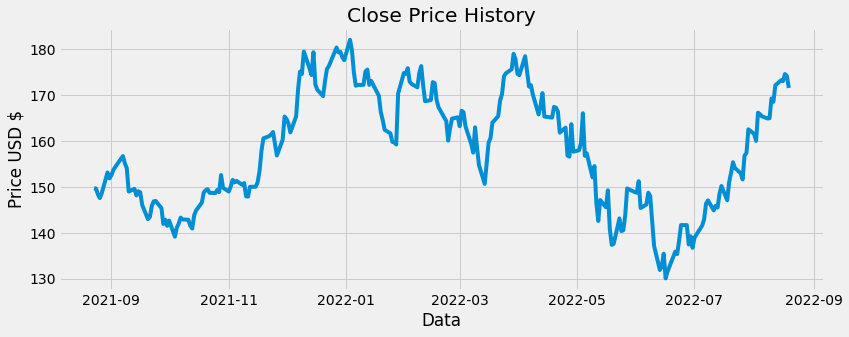

In [4]:
#Visualization
plt.figure(figsize=(12.2,4.5))
plt.plot(df['Close'], label='Close')
plt.title('Close Price History')
plt.xlabel('Data')
plt.ylabel('Price USD $')
plt.show

In [6]:
#Calculate MACD and signal lines

#Calculate the short term EMA lines
ShortEMA = df.Close.ewm(span=12, adjust=False).mean()

#Calculate the long term EMA lines
LongEMA = df.Close.ewm(span=26, adjust=False).mean()

#Calculate the MACD
MACD = ShortEMA - LongEMA

#Calculate signal line
Signal = MACD.ewm(span=9, adjust=False).mean()

<function matplotlib.pyplot.show(*args, **kw)>

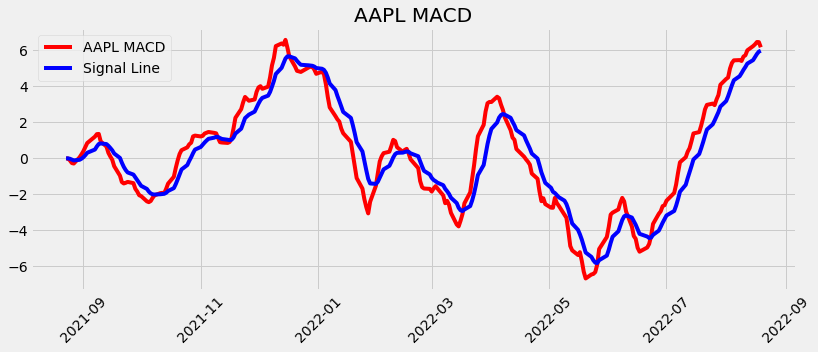

In [7]:
#Plottint

plt.figure(figsize=(12.2,4.5))
plt.title('AAPL MACD')
plt.plot(df.index, MACD, label= "AAPL MACD", color='red')
plt.plot(df.index, Signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show

In [8]:
df['MACD'] = MACD
df['Signal Line'] = Signal
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line
Date,,,,,,,,,
2021-08-23,2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875778,60131800,0.000000,0.000000
2021-08-24,2021-08-24,149.449997,150.860001,149.149994,149.619995,148.786270,48606400,-0.007180,-0.001436
2021-08-25,2021-08-25,149.809998,150.320007,147.800003,148.360001,147.533279,58991300,-0.113237,-0.023796
2021-08-26,2021-08-26,148.350006,149.119995,147.509995,147.539993,146.717865,48597200,-0.260452,-0.071127
2021-08-27,2021-08-27,147.479996,148.750000,146.830002,148.600006,147.771957,55802400,-0.288265,-0.114555
...,...,...,...,...,...,...,...,...,...
2022-08-15,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700,6.235965,5.457951
2022-08-16,2022-08-16,172.779999,173.710007,171.660004,173.029999,173.029999,56377100,6.336180,5.633597
2022-08-17,2022-08-17,172.770004,176.149994,172.570007,174.550003,174.550003,79542000,6.463743,5.799626


In [9]:
#Create a function to signal when to buy and sell an assest
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['Signal Line'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['Close'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['Signal Line'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['Close'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Sell.append(np.nan)
      Buy.append(np.nan)
  return (Buy,Sell)

In [10]:
#Create buy and sell Column
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [11]:
#Show Data
df

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,,
2021-08-23,2021-08-23,148.309998,150.190002,147.889999,149.710007,148.875778,60131800,0.000000,0.000000,NaN,NaN
2021-08-24,2021-08-24,149.449997,150.860001,149.149994,149.619995,148.786270,48606400,-0.007180,-0.001436,NaN,149.619995
2021-08-25,2021-08-25,149.809998,150.320007,147.800003,148.360001,147.533279,58991300,-0.113237,-0.023796,NaN,NaN
2021-08-26,2021-08-26,148.350006,149.119995,147.509995,147.539993,146.717865,48597200,-0.260452,-0.071127,NaN,NaN
2021-08-27,2021-08-27,147.479996,148.750000,146.830002,148.600006,147.771957,55802400,-0.288265,-0.114555,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-08-15,2022-08-15,171.520004,173.389999,171.350006,173.190002,173.190002,54091700,6.235965,5.457951,NaN,NaN
2022-08-16,2022-08-16,172.779999,173.710007,171.660004,173.029999,173.029999,56377100,6.336180,5.633597,NaN,NaN
2022-08-17,2022-08-17,172.770004,176.149994,172.570007,174.550003,174.550003,79542000,6.463743,5.799626,NaN,NaN


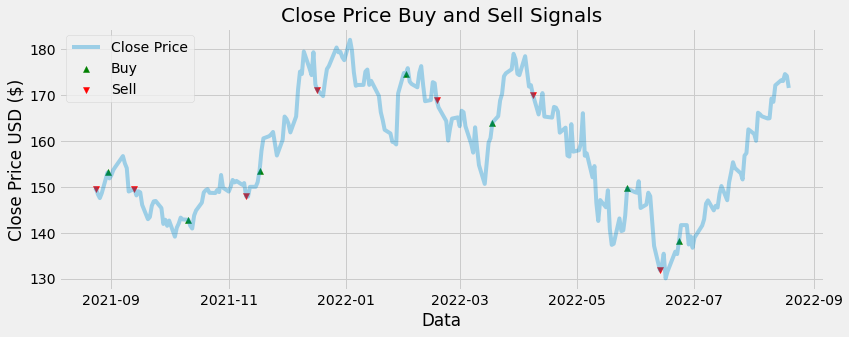

In [16]:
#Visually Show stock buy and sell
plt.figure(figsize=(12.2,4.5))
plt.scatter(df.index, df['Buy_Signal_Price'] , color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['Sell_Signal_Price'] , color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Close'], label='Close Price', alpha=0.35)
plt.title('Close Price Buy and Sell Signals')
plt.xlabel('Data')
plt.ylabel('Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()